In [23]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

In [24]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\bhanu\\OneDrive\\Desktop\\flipkartgrid\\interactions_information.csv')
df.columns = ['user_id', 'product_id', 'categorie', 'sub_categorie','rating']
df_copy = df.copy(deep=True)

In [25]:
# Display basic information about the DataFrame
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  98561
No of columns =  5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98561 entries, 0 to 98560
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        98561 non-null  object
 1   product_id     98561 non-null  int64 
 2   categorie      98561 non-null  object
 3   sub_categorie  98561 non-null  object
 4   rating         98561 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


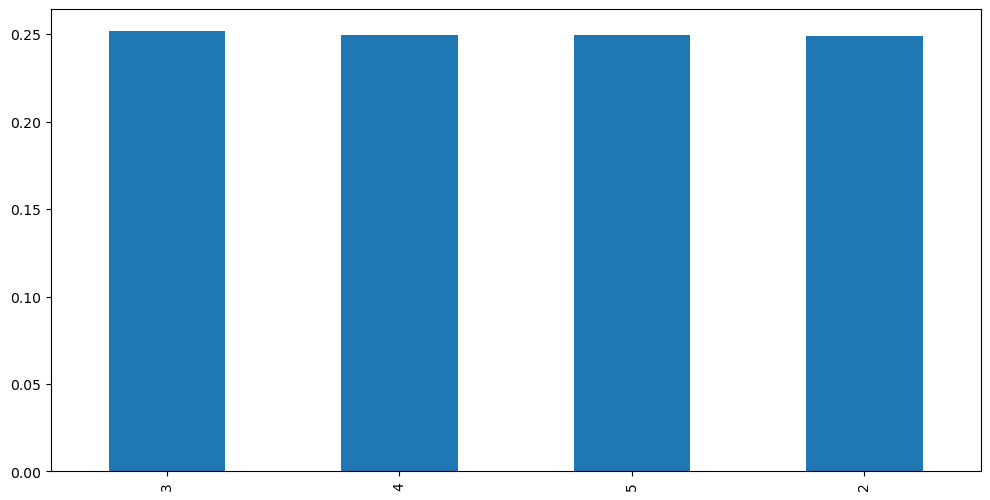

In [27]:
# Create a bar plot to visualize the distribution of ratings
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [28]:
# Display the number of unique users and unique products in the raw data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['product_id'].nunique())

Number of unique USERS in Raw data =  500
Number of unique ITEMS in Raw data =  284


In [29]:
# Group users by the number of interactions and get the most active users
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
HC5     418
ON8     412
FR77    409
LU87    405
GO9     402
OO2     402
CO96    400
KR42    400
QB55    395
SJ68    393
dtype: int64

In [30]:
# Count the number of interactions per user
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]

In [31]:
# Display information about the final filtered data
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['product_id'].nunique())

The number of observations in the final data = 96999
Number of unique USERS in the final data =  437
Number of unique PRODUCTS in the final data =  284


In [32]:
# Group data by user and product, calculate average ratings
aggregated_df = df_final.groupby(['user_id', 'product_id'])['rating'].mean().reset_index()

In [33]:
# Create a pivot table for collaborative filtering
final_ratings_matrix = aggregated_df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

In [34]:
# Calculate the density of the rating matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
density = (given_num_of_ratings / possible_num_of_ratings) * 100

print('Shape of final_ratings_matrix:', final_ratings_matrix.shape)
print('given_num_of_ratings =', given_num_of_ratings)
print('possible_num_of_ratings =', possible_num_of_ratings)
print('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix: (437, 284)
given_num_of_ratings = 62200
possible_num_of_ratings = 124108
density: 50.12%


In [35]:
# Add a user index column and set it as the index
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()


product_id,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,...,11013,11014,11015,11016,11017,11018,11019,11020,11021,11022
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,3.0,0.000000,0.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,4.5,0.0,5.0,0.0,0.0,0.0,0.00
1,0.0,3.0,0.0,0.000000,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,5.0,0.0,3.0,0.000000,5.0,5.0,3.5,0.0,4.0,0.0,...,4.0,4.0,4.0,4.0,4.0,0.0,3.0,0.0,0.0,2.00
3,0.0,0.0,4.0,0.000000,3.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,4.0,0.0,0.0,5.0,5.0,2.0,0.0,5.00
4,4.0,0.0,0.0,3.333333,3.0,5.0,0.0,5.0,0.0,2.0,...,3.0,0.0,0.0,5.0,0.0,2.5,2.5,0.0,4.0,2.75


In [36]:
final_ratings_matrix.head()

product_id,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,...,11013,11014,11015,11016,11017,11018,11019,11020,11021,11022
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,3.0,0.000000,0.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,4.5,0.0,5.0,0.0,0.0,0.0,0.00
1,0.0,3.0,0.0,0.000000,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,5.0,0.0,3.0,0.000000,5.0,5.0,3.5,0.0,4.0,0.0,...,4.0,4.0,4.0,4.0,4.0,0.0,3.0,0.0,0.0,2.00
3,0.0,0.0,4.0,0.000000,3.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,4.0,0.0,0.0,5.0,5.0,2.0,0.0,5.00
4,4.0,0.0,0.0,3.333333,3.0,5.0,0.0,5.0,0.0,2.0,...,3.0,0.0,0.0,5.0,0.0,2.5,2.5,0.0,4.0,2.75


In [37]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

In [38]:
similar = similar_users(152, final_ratings_matrix)[0][0:10]
similar

[338, 236, 113, 6, 367, 318, 412, 85, 5, 80]

In [39]:
#Print the similarity score
similar_users(152,final_ratings_matrix)[1][0:10]

[array([[0.6859484]]),
 array([[0.67396906]]),
 array([[0.66801578]]),
 array([[0.65779889]]),
 array([[0.65574999]]),
 array([[0.6556004]]),
 array([[0.6549913]]),
 array([[0.65229331]]),
 array([[0.65037249]]),
 array([[0.65003591]])]

In [40]:
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

In [41]:
recommendations(3,5,final_ratings_matrix)

[10756, 10758, 10766, 10771, 10774]

In [42]:
recommendations(152,5,final_ratings_matrix)

[10753, 10754, 10755, 11012, 10885]